# Transferencia de Hohmann
Este codigo hara un analisis numerico de la transferencia de Hohmann para hacer una simulación de la Tierra a Marte y de la Tierra a Jupiter.

### Transferencia de Hohmann interplanetaria de la Tierra a Marte

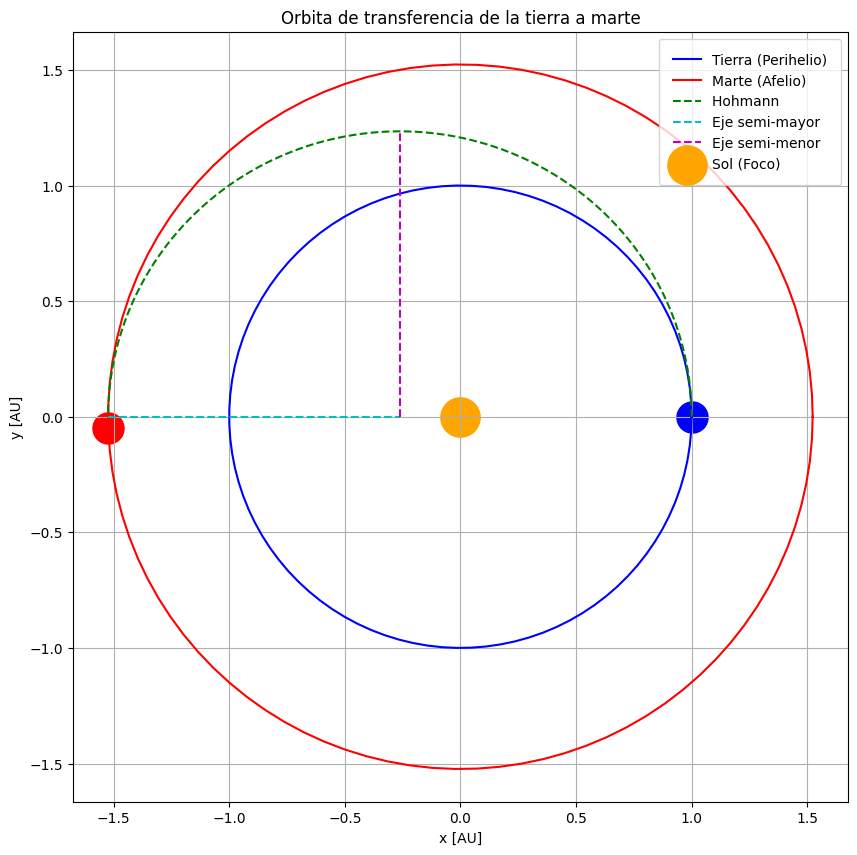

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constantes
GM = 4 * np.pi**2  # Constante gravitacional
r_tierra = 1.0  # Radio tierra en UA
r_marte = 1.52366  # Radio Marte UA

# calcula velocidad a un radio r en cualquier momento
def vis_viva(r, a):
    return np.sqrt(GM * (2 / r - 1 / a))

# Aceleracion gravitatoria
def gravitational_acceleration(t, y):
    r = np.sqrt(y[0]**2 + y[1]**2)  
    ax = -GM * y[0] / r**3 #eje x
    ay = -GM * y[1] / r**3 #eje y
    return [y[2], y[3], ax, ay]

# Condiciones iniciales de tierra a marte
a_transfer = (r_tierra + r_marte) / 2  # eje semi mayor de la transferenica
b_transfer=np.sqrt(r_tierra*r_marte) #eje semi menor de la transferencia
ecentricidad = (r_marte - r_tierra) / (r_marte + r_tierra) #ecentricicdad
foco = a_transfer * ecentricidad #centro del elipse

v_earth = vis_viva(r_tierra, r_tierra)  # velocidad en la tierra
v_transfer_perihelion = vis_viva(r_tierra, a_transfer)  # velocidad en perihelio de transferencia
# Posicion inicial
y0 = [r_tierra, 0, 0, v_transfer_perihelion]  # [x, y, vx, vy]

# Tiempo
T_transfer = np.pi * np.sqrt(a_transfer**3 / (GM))  # Periodo
time_span = [0, T_transfer]

# Sesoluciona ecuacion diferencial con solve_ivp
sol = solve_ivp(gravitational_acceleration, time_span, y0, max_step=0.001)

# Se obtienen valores de solucion
x_transfer, y_transfer = sol.y[0], sol.y[1]

# Orbitas del sol y tierra
theta = np.linspace(0, 2 * np.pi, 100)
x_earth = r_tierra * np.cos(theta)
y_earth = r_tierra * np.sin(theta)
x_mars = r_marte * np.cos(theta)
y_mars = r_marte * np.sin(theta)

# Grafica de orbitas
plt.figure(figsize=(10, 10))
plt.plot(x_earth, y_earth, label="Tierra (Perihelio)", color="blue") #tierra
plt.scatter(x_earth[0],y_earth[0],color='blue', s=500) #tierra
plt.plot(x_mars, y_mars, label="Marte (Afelio)", color="red") #marte
plt.scatter(x_mars[50],y_mars[50],color='red', s=500) #marte
plt.plot(x_transfer, y_transfer, label="Hohmann ", color="green", linestyle="dashed") #Hohmann
plt.plot([-a_transfer-foco,-foco], [0, 0], 'c--', label="Eje semi-mayor") #eje semi-mayor
plt.plot([-foco, -foco], [0, b_transfer], 'm--', label="Eje semi-menor") #eje semi-menor
plt.scatter([0], [0], color="orange", label="Sol (Foco)",s=800) #Sol
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.title('Orbita de transferencia de la tierra a marte')
plt.legend(borderpad=1)
plt.grid(True)
plt.axis('equal')
plt.show()


### Transferencia de Hohmann interplanetaria de la Tierra a Jupiter

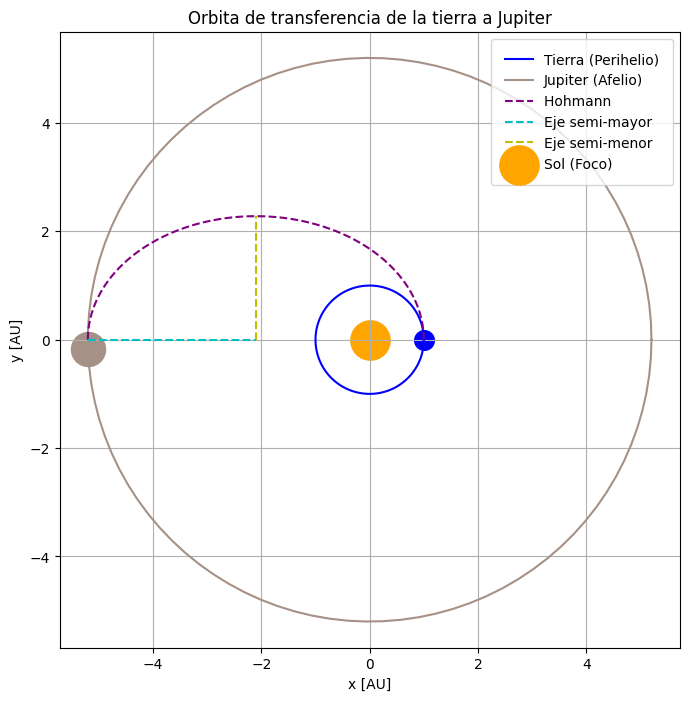

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constantes
GM = 4 * np.pi**2  # Constante gravitacional
r_tierra = 1.0  # Radio tierra en UA
r_jupiter = 5.2025  # Radio Marte UA

# calcula velocidad a un radio r en cualquier momento
def vis_viva(r, a):
    return np.sqrt(GM * (2 / r - 1 / a))

# Aceleracion gravitatoria
def gravitational_acceleration(t, y):
    r = np.sqrt(y[0]**2 + y[1]**2)  
    ax = -GM * y[0] / r**3 #eje x
    ay = -GM * y[1] / r**3 #eje y
    return [y[2], y[3], ax, ay]

# Condiciones iniciales de tierra a marte
a_transfer = (r_tierra + r_jupiter) / 2  # eje semi mayor de la transferenica
b_transfer=np.sqrt(r_tierra*r_jupiter) #eje semi menor de la transferencia
ecentricidad = (r_jupiter - r_tierra) / (r_jupiter + r_tierra) #ecentricicdad
foco = a_transfer * ecentricidad #centro del elipse

v_earth = vis_viva(r_tierra, r_tierra)  # velocidad en la tierra
v_transfer_perihelion = vis_viva(r_tierra, a_transfer)  # velocidad en perihelio de transferencia
# Posicion inicial
y0 = [r_tierra, 0, 0, v_transfer_perihelion]  # [x, y, vx, vy]

# Tiempo
T_transfer = np.pi * np.sqrt(a_transfer**3 / (GM))  # Periodo
time_span = [0, T_transfer]

# Sesoluciona ecuacion diferencial con solve_ivp
sol = solve_ivp(gravitational_acceleration, time_span, y0, max_step=0.001)

# Se obtienen valores de solucion
x_transfer, y_transfer = sol.y[0], sol.y[1]

# Orbitas del sol y tierra
theta = np.linspace(0, 2 * np.pi, 100)
x_earth = r_tierra * np.cos(theta)
y_earth = r_tierra * np.sin(theta)
x_jupiter = r_jupiter * np.cos(theta)
y_jupiter = r_jupiter * np.sin(theta)

# Grafica de orbitas
plt.figure(figsize=(8, 8))
plt.plot(x_earth, y_earth, label="Tierra (Perihelio)", color="blue") #tierra
plt.scatter(x_earth[0],y_earth[0],color='blue', s=200) #tierra
plt.plot(x_jupiter, y_jupiter, label="Jupiter (Afelio)", color="#A59186") #jupiter
plt.scatter(x_jupiter[50],y_jupiter[50],color='#A59186', s=600) #jupiter
plt.plot(x_transfer, y_transfer, label="Hohmann ", color="purple", linestyle='dashed') #Hohmann
plt.plot([-a_transfer-foco,-foco], [0,0], 'c--', label="Eje semi-mayor") # eje semi-mayor
plt.plot([-foco, -foco], [0, b_transfer], 'y--', label="Eje semi-menor") #eje semi-menor
plt.scatter([0], [0], color="orange", label="Sol (Foco)",s=800) #Sol
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.title('Orbita de transferencia de la tierra a Jupiter')
plt.legend(borderpad=1)
plt.grid(True)
plt.axis('equal')
plt.show()

